# Data quality report

In [34]:
# import libs
import datetime as dt
import ipywidgets as widgets
import yaml
import os
#
from IPython.display import display, clear_output
from src.visualization.check_processed_data import Dashboard
#
%matplotlib inline

file_widget = widgets.Dropdown(description="Metafile", options=os.listdir('../metadata'))
date_widget = widgets.Text(description="Date", value="2017-11-17 00:00:00")

@widgets.interact()
def list_of_files(metafile=file_widget, strdate=date_widget):
    
    # make global
    global d
    global date
        
    # open metadata file
    metafile = "../metadata/" + metafile
    with open(metafile, "r") as f:
        metadata = yaml.safe_load(f)
    
    # get name, start and final dates
    name, start, final = metadata["name"], metadata["t_ini"], metadata["t_fin"]
    string = f"{name.upper()} contains data from {start} to {final}"
    print(string)
    
    #date_widget.value = f"{start} 00:00:00"
    
    # parse date to datetime objetct
    try:
        date = dt.datetime.strptime(strdate, "%Y-%m-%d %H:%M:%S")
    except:
        print("*Incorrect data format, should be YYYY-MM-DD HH:MM:SS")
    
    # instance of the dashboard class
    d = Dashboard(metafile, number_of_minutes=10)

#@widgets.interact_manual()
#def generate_output():
#    d.generate_report(date)
#%%javascript
#IPython.OutputArea.prototype._should_scroll = function(lines) {
#    return false;
#}

interactive(children=(Dropdown(description='Metafile', options=('bomm1_its.yml', 'bomm2_its.yml', 'bomm1_per1.…

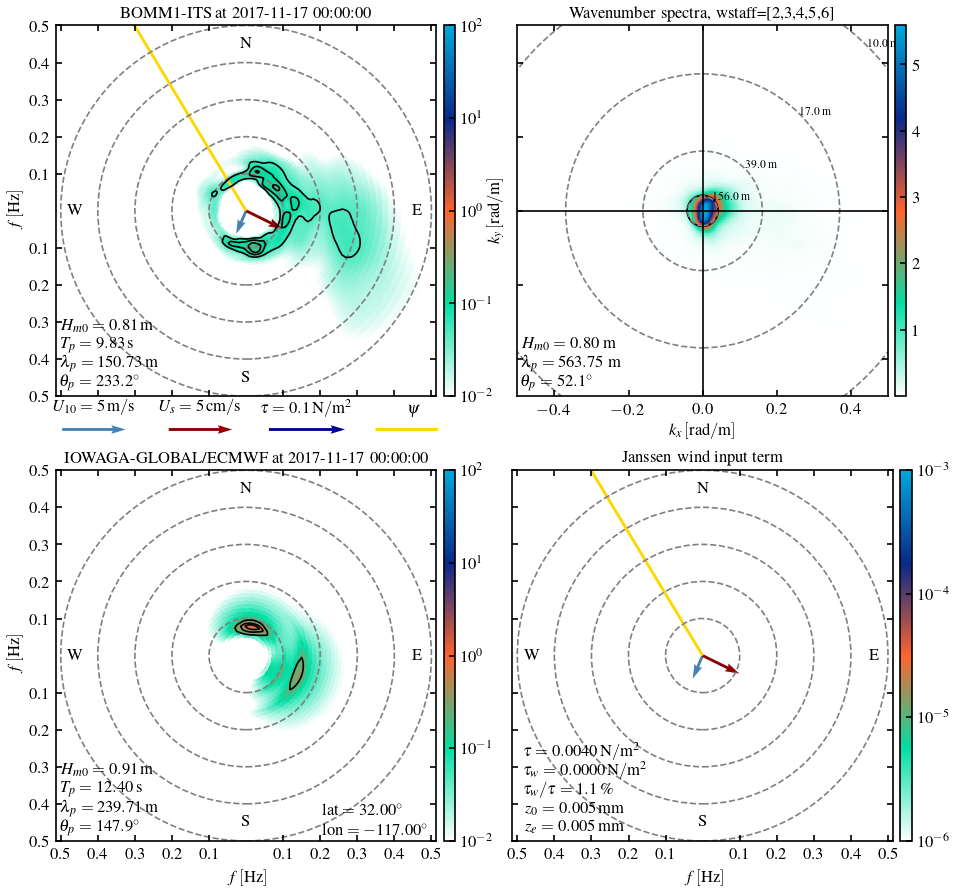

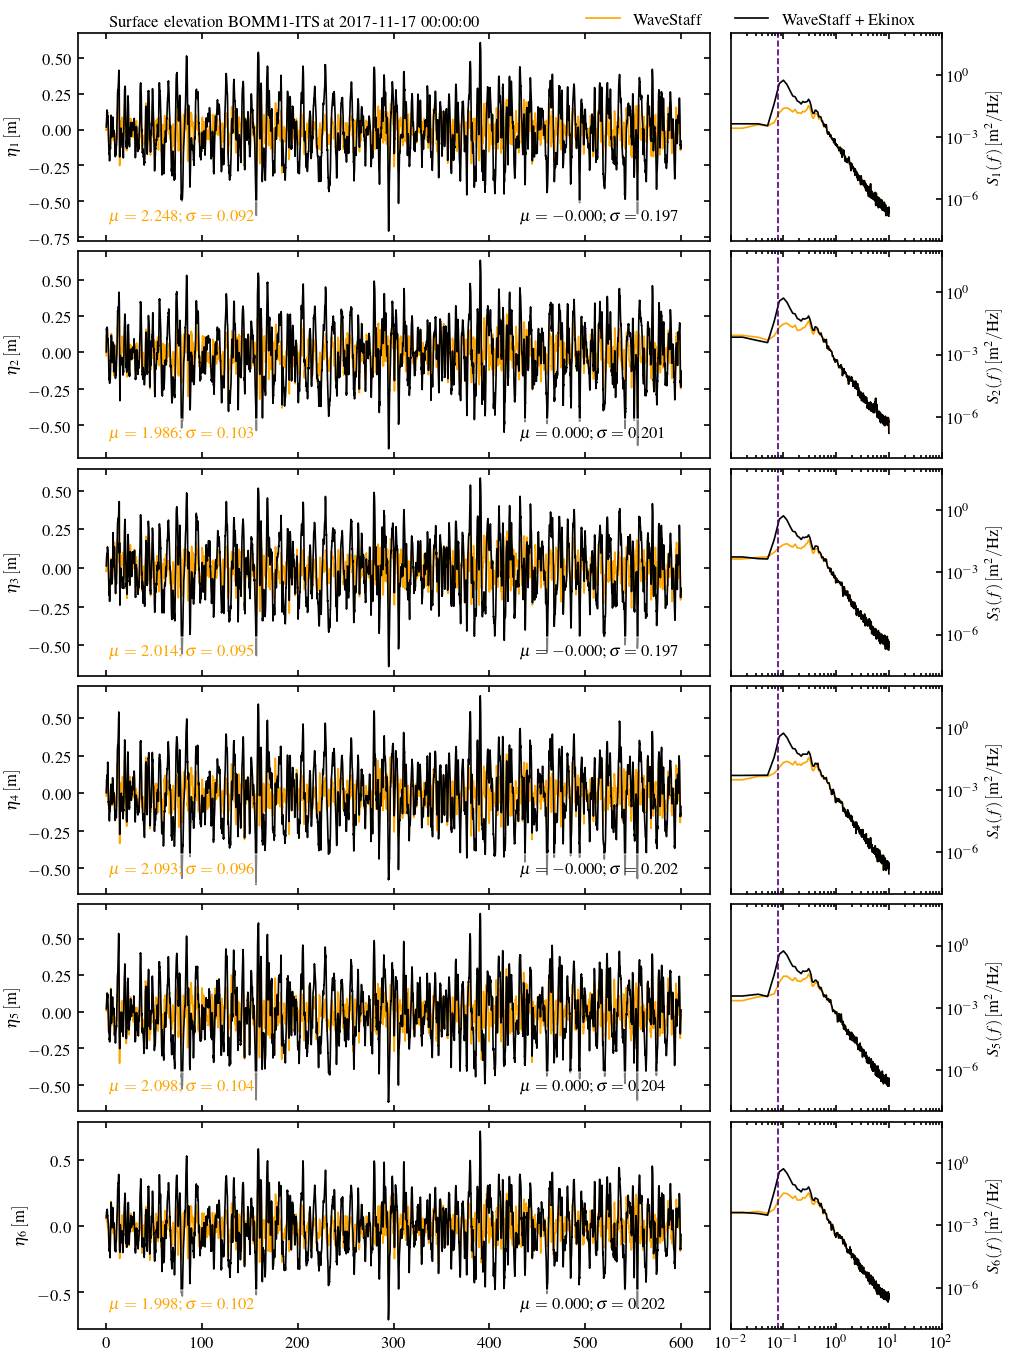

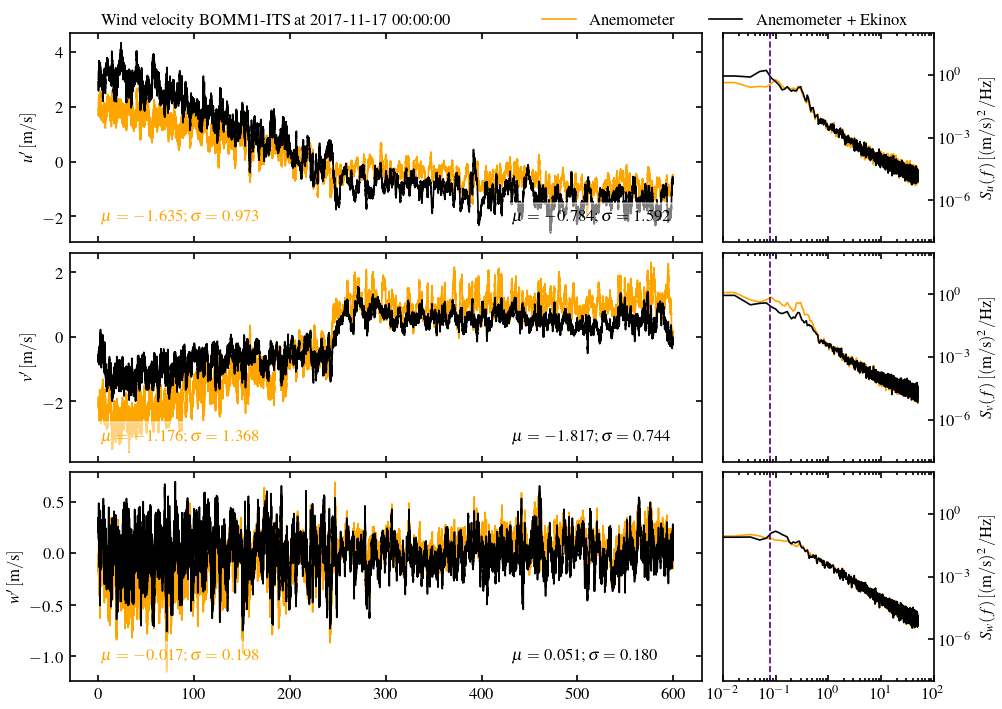

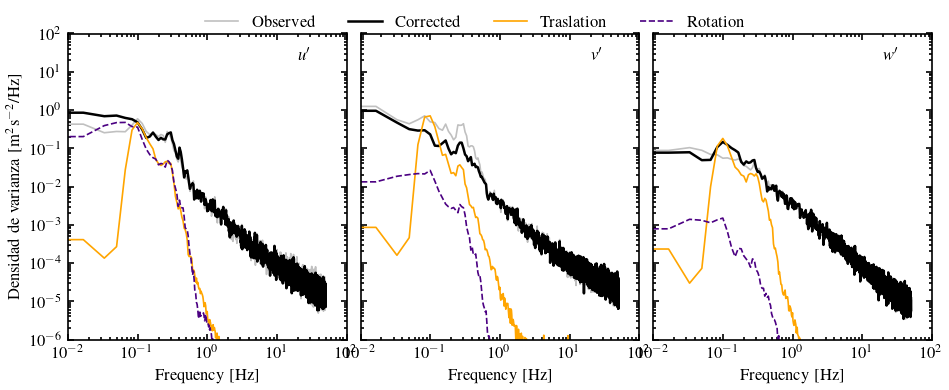

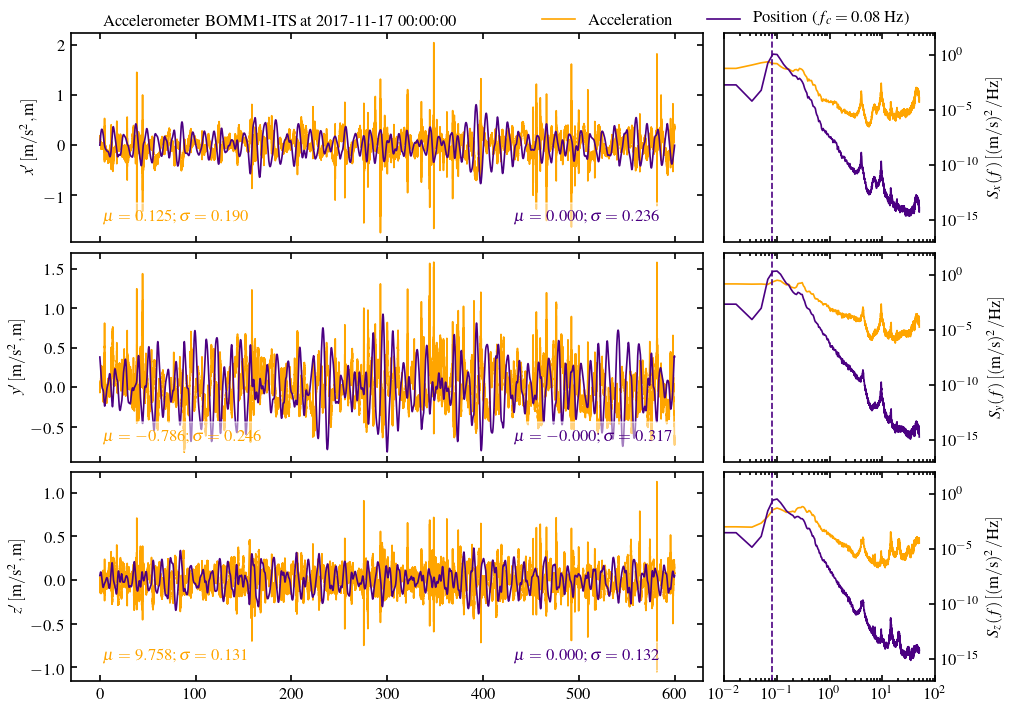

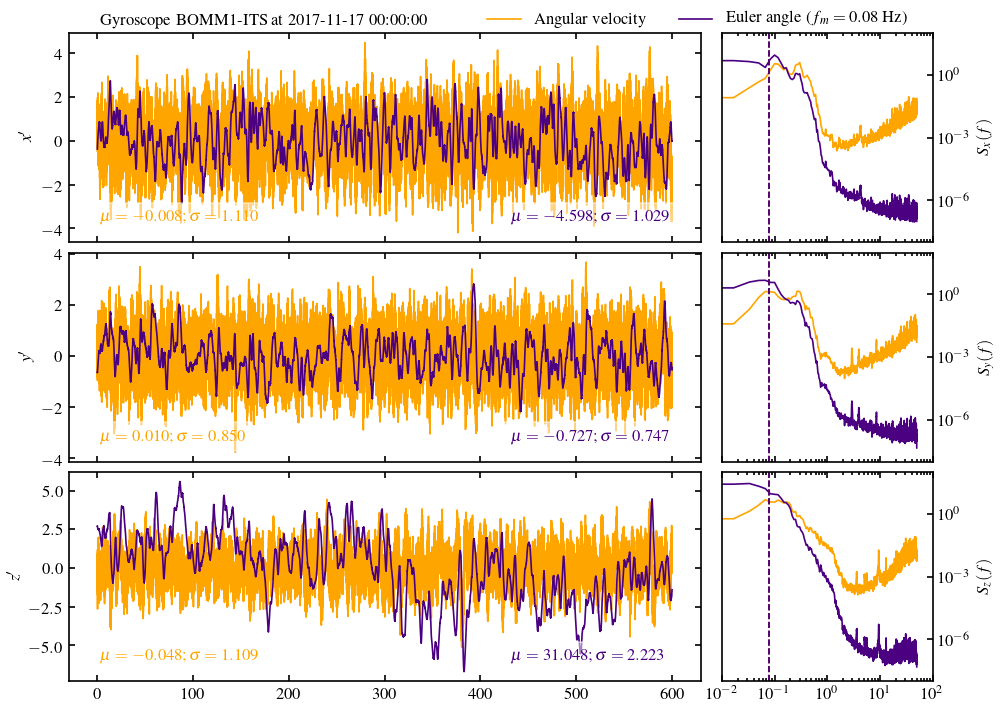

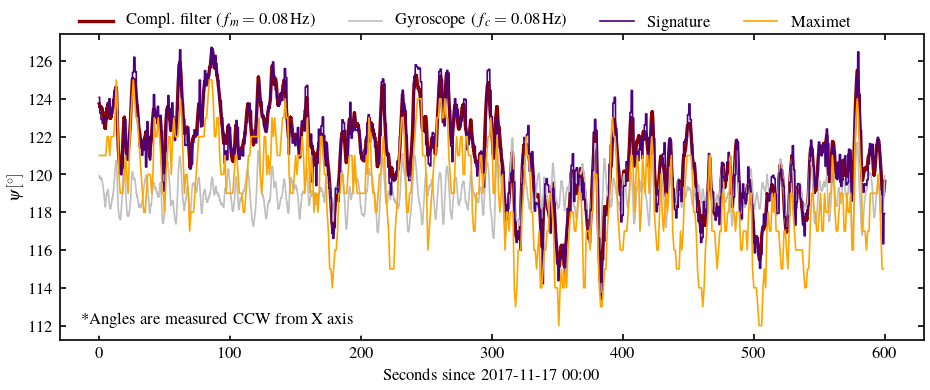

In [35]:
d.generate_report(date)